### Desafío 1: Preparar el ambiente de trabajo
* Importe todas las librerías a utilizar.
* Fije los parámetros de los gráficos con plt.Rcparams .
* Excluya las columnas id y Unnamed: 32 de la base de datos.
* Recodifique el vector objetivo diagnosis a numérico para poder procesarlo posteriormente

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

plt.style.use('seaborn')

import functions as fnc

In [32]:
df_cancer = pd.read_csv('breast_cancer.csv')
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [33]:
df_cancer.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [35]:
df_cancer['diagnosis'].value_counts('%')

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

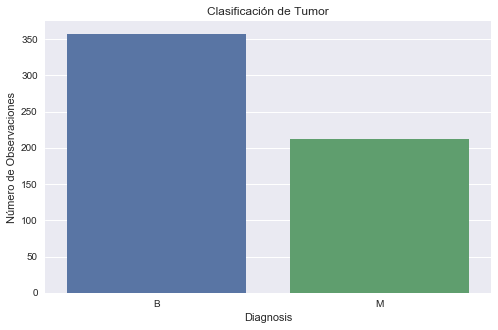

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(x='diagnosis', data=df_cancer, order=df_cancer['diagnosis'].value_counts().index)
plt.xlabel('Diagnosis')
plt.ylabel("Número de Observaciones")
plt.title("Clasificación de Tumor")
plt.savefig("Conteo de las clases");

In [37]:
df_cancer['diagnosis'] = np.where(df_cancer['diagnosis'] == 'M', 1, 0)
df_cancer['diagnosis'].value_counts('%')

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

### Desafío 2: Visualizando la distribución de los atributos
* Para cada uno de los atributos, grafique los histogramas condicional a cada clase del vector objetivo.
* Agregue las medias correspondientes y reporte a grandes rasgos cuáles son los atributos con una mayor similitud en la distribución.

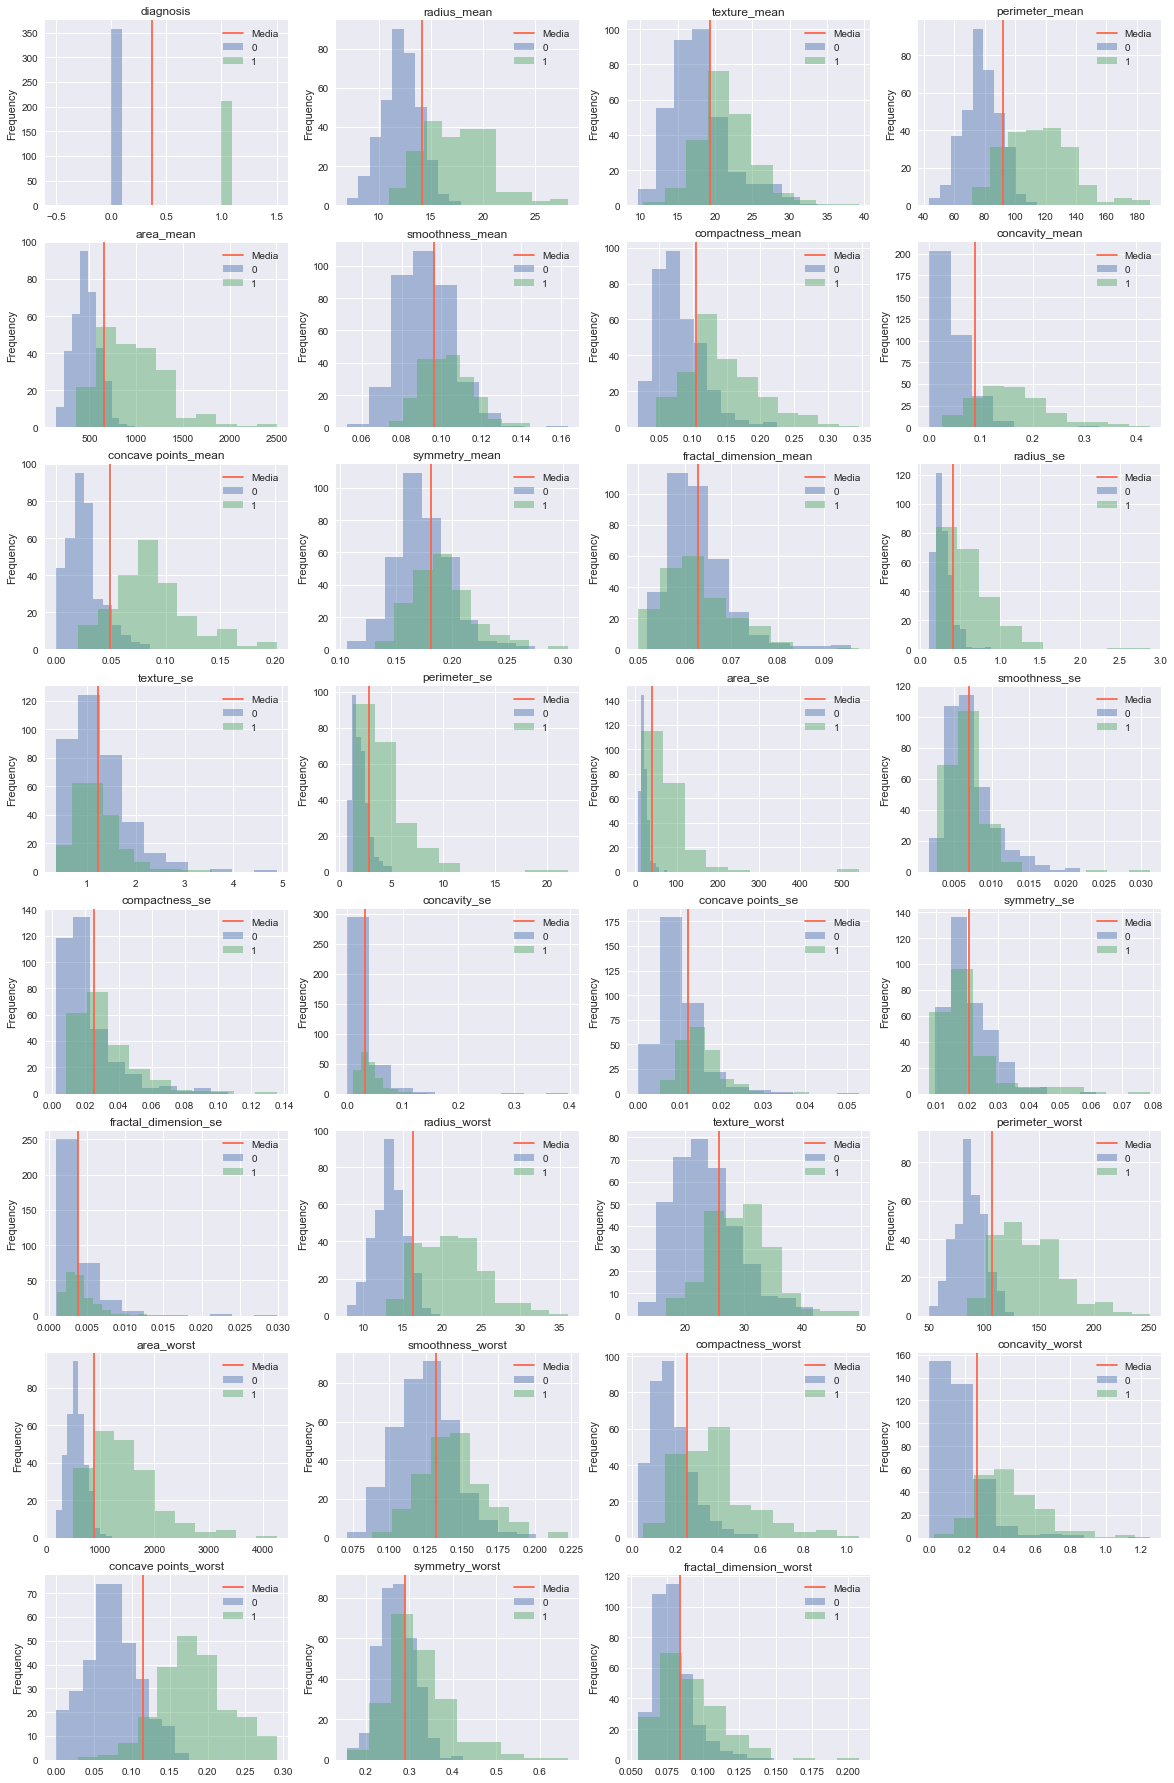

In [38]:
plt.figure(figsize=(20,32))

for index, value in enumerate(df_cancer):
    plt.subplot(8, 4, index + 1)
    df_cancer.groupby('diagnosis')[value].plot(kind='hist', alpha=.45)
    plt.axvline(df_cancer[value].mean(), color='tomato', label="Media")
    plt.legend(df_cancer['diagnosis'].unique())
    plt.title(value)
    plt.legend()
plt.savefig("Histogramas de Atributos")

### Desafío 3: Estimando el porcentaje de overlap en los atributos
* Parte de las virtudes de las Máquinas de Soporte Vectorial es la capacidad de lidiar con clases
no separables mediante el proceso de kernelización. Resulta que un aspecto importante que
muchas veces se obvía es medir la noseparabilidad de los atributos, condicional a cada clase
del vector objetivo.
* El procedimiento para estimar el rango de noseparabilidad entre clases se implementa en
Python de la siguiente manera:
__h1, _ = np.histogram(var1, bins=100) # estimamos la frecuencia de obs. en
100 espacios definidos
h2, _ = np.histogram(var2, bins=100) # estimamos la frecuencia de obs. en
100 espacios definidos
get_minima = np.minimum(h1, h2) # extraemos el mínimo de observaciones
comunes entre h1 y h2
intersection = np.true_divide(np.sum(get_minima), np.sum(tmp_2)) # Estimamos
la intersección de elementos comunes__
* La intersección devolverá el porcentaje de comunalidad entre ambas clases, donde mayores
niveles indican una mayor comunalidad.
* Generalice el código de arriba en una función para evaluar el porcentaje de noseparabilidad
entre las clases para cada atributo.
* Posteriormente genere un dataframe donde almacenará el nombre del atributo y su
porcentaje. Ordene este dataframe de forma descendente y preserve.


In [39]:
fnc.overlap_percent(df_cancer)

,index,atributo,percent
0,0,diagnosis,1.000000
1,10,fractal_dimension_mean,0.886792
2,16,compactness_se,0.882075
3,6,compactness_mean,0.872642
4,30,fractal_dimension_worst,0.872642
5,22,texture_worst,0.867925
6,11,radius_se,0.867925
7,19,symmetry_se,0.863208
8,9,symmetry_mean,0.858491
9,2,texture_mean,0.858491


### Desafío 4: Selección del modelo por GridSearchCV
* Entrene una serie de modelos SVC con los siguientes hiperparámetros:
 * C: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] .
 * gamma: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10] .
 * Validaciones cruzadas: 10.
* Genere un heatmap en base a los puntajes estimados con GridSearchCV .

__tip: Vea cómo acceder a la llave mean_test_score en el diccionario cv_results_ .__
* Reporte en qué rango de cada hiperparámetro el modelo presenta un desempeño eficiente.
* Reporte la mejor combinación de hiperparámetros y el desempeño en la muestra de
entrenamiento.

In [40]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

Modelo sin hiperparametros __(Aunque no lo pidieron lo hice para ir practicando)__

In [41]:
X = df_cancer.drop(columns=['diagnosis'])
Y = df_cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=11238)

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

model_svc = SVC().fit(X_train_scaled, y_train)
model_svc_pred = model_svc.predict(X_test_scaled)

In [42]:
print(classification_report(y_test, model_svc_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       101
           1       0.99      0.94      0.96        70

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [43]:
#Buscar la mejor combinación de hiperparametros con GridSearchCV
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
param_grid = dict(C=c, gamma=gamma)
gridsearch = GridSearchCV(SVC(), param_grid=param_grid, n_jobs=-1, cv=10)
result = gridsearch.fit(X_train_scaled, y_train)

In [44]:
print("Mejor Resultado: %f usando hiperparametros: %s" % (result.best_score_, result.best_params_) )

Mejor Resultado: 0.977387 usando hiperparametros: {'C': 1000, 'gamma': 0.0001}


In [45]:
model_svc = SVC(C=1000, gamma=0.0001).fit(X_train_scaled, y_train)
model_svc_pred = model_svc.predict(X_test_scaled)

In [46]:
print(classification_report(y_test, model_svc_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       101
           1       1.00      0.91      0.96        70

   micro avg       0.96      0.96      0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



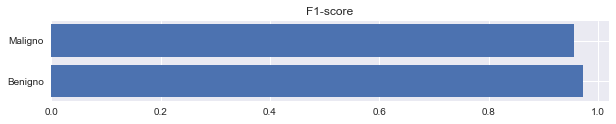

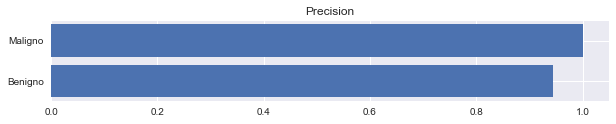

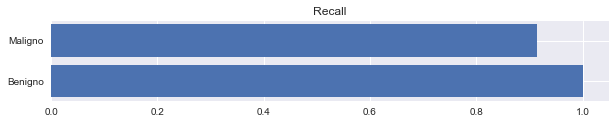

In [47]:
fnc.class_report(y_test, model_svc_pred)

In [48]:
result_mts_reshape = np.reshape(result.cv_results_['mean_test_score'], (8,7))

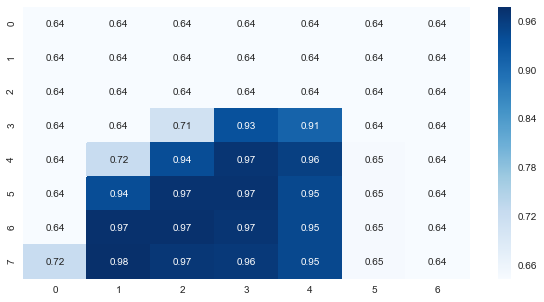

In [49]:
plt.figure(figsize=(10, 5))
sns.heatmap(result_mts_reshape,  cmap="Blues", annot=True);

### Desafío 5: Validación del modelo en el hold-out sample
* Genere las predicciones del hold-out sample en base a la mejor combinación de
hiperparámetros. 
* Genere un reporte con las métricas de desempeño clásicas para los
modelos de clasificación. Comente en qué casos el modelo presenta un desempeño deficiente

In [50]:
X_train_dev, X_test_dev, y_train_dev, y_test_dev = train_test_split(X_train, y_train, test_size=.33, random_state=11238)

X_train_dev_scaled = StandardScaler().fit_transform(X_train_dev)
X_test_dev_scaled = StandardScaler().fit_transform(X_test_dev)

#Buscar la mejor combinación de hiperparametros con GridSearchCV
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
param_grid = dict(C=c, gamma=gamma)
gridsearch = GridSearchCV(SVC(), param_grid=param_grid, n_jobs=-1, cv=10)
result = gridsearch.fit(X_train_dev_scaled, y_train_dev)

print("Mejor Resultado: %f usando hiperparametros: %s" % (result.best_score_, result.best_params_) )

Mejor Resultado: 0.981203 usando hiperparametros: {'C': 10, 'gamma': 0.01}


In [51]:
model_svc_holdout = SVC(C=10, gamma=0.01).fit(X_train_dev_scaled, y_train_dev)
model_svc_holdout_pred = model_svc_holdout.predict(X_test_dev_scaled)

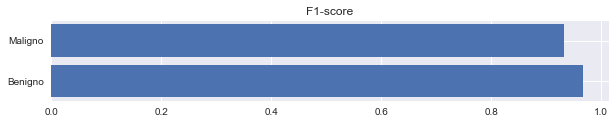

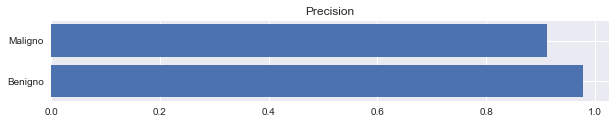

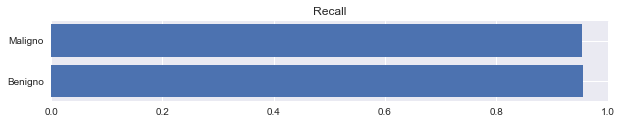

In [52]:
fnc.class_report(y_test_dev, model_svc_holdout_pred)

In [53]:
print(classification_report(y_test_dev, model_svc_holdout_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        89
           1       0.91      0.95      0.93        43

   micro avg       0.95      0.95      0.95       132
   macro avg       0.94      0.95      0.95       132
weighted avg       0.96      0.95      0.95       132



El modelo presenta un peor desempeño en cuanto a reconocer un Maligno de acuerdo al __recall__ en comparación el desempeño de las otras metricas, si pudiera mejorar para optimizarlo.

### Desafío (opcional): Depuración de atributos
* Reentrene el modelo en función de los atributos que presenten un coeficiente de overlap menor a .45.
* Reporte el desempeño del modelo y comente sobre los nuevos hiperparámetros estimados,
así como su desempeño en comparación al modelo del ejercicio 4

In [54]:
df_cancer2 = df_cancer[['concavity_worst', 'concavity_mean', 'concavity_se']]

In [55]:
X2, Y2 = df_cancer2, df_cancer['diagnosis']

#Divido la data en las matrices de entrenamiento y validación
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=.33, random_state=1238)

#Estandarizo las matrices
X_train2_scaled = StandardScaler().fit_transform(X_train2)
X_test2_scaled = StandardScaler().fit_transform(X_test2)

#Buscar la mejor combinación de hiperparametros con GridSearchCV
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
param_grid = dict(C=c, gamma=gamma)
gridsearch = GridSearchCV(SVC(), param_grid=param_grid, n_jobs=-1, cv=10)
result = gridsearch.fit(X_train2_scaled, y_train2)

In [56]:
print("Mejor Resultado: %f usando hiperparametros: %s" % (result.best_score_, result.best_params_) )

Mejor Resultado: 0.939633 usando hiperparametros: {'C': 100, 'gamma': 0.1}


In [57]:
model_svc2 = SVC(C=100, gamma=0.1).fit(X_train2_scaled, y_train2)
model_svc2_pred = model_svc2.predict(X_test2_scaled)

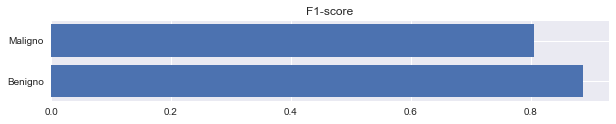

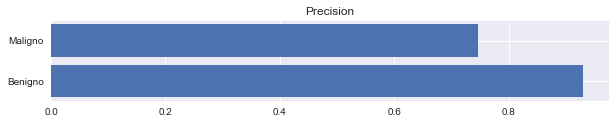

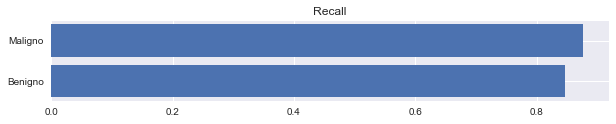

In [58]:
fnc.class_report(y_test2, model_svc2_pred)

Los hiperparametros para está oportunidad han cambiado y ahora __C:100__ y __gamma:0.1__, el modelo ha empeorado con respecto al otro